In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
# Define the path to the Excel file
file_path = r"C:\Users\KHUSHI\Downloads\pred_churn.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(data.head())


  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   82109-MAH  Female   40     Yes    Maharashtra                    4   
1   82119-UTT    Male   52      No  Uttar Pradesh                   11   
2   82120-UTT    Male   34     Yes  Uttar Pradesh                   14   
3   82141-UTT  Female   20     Yes  Uttar Pradesh                   15   
4   82174-TEL  Female   53      No      Telangana                   15   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                22     Deal 2           Yes            Yes  ...   
1                 2        NaN           Yes             No  ...   
2                35        NaN           Yes            Yes  ...   
3                 5     Deal 1           Yes            Yes  ...   
4                20     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge  Total_Charges  Total_Refunds  \
0      Credit Card      78.650002    3950.850098            0.0   
1      Credi

In [2]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
 
# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [4]:
# Make predictions
y_pred = rf_model.predict(X_test)
 
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
 
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

Confusion Matrix:
[[5121    0]
 [   0 2088]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5121
           1       1.00      1.00      1.00      2088

    accuracy                           1.00      7209
   macro avg       1.00      1.00      1.00      7209
weighted avg       1.00      1.00      1.00      7209



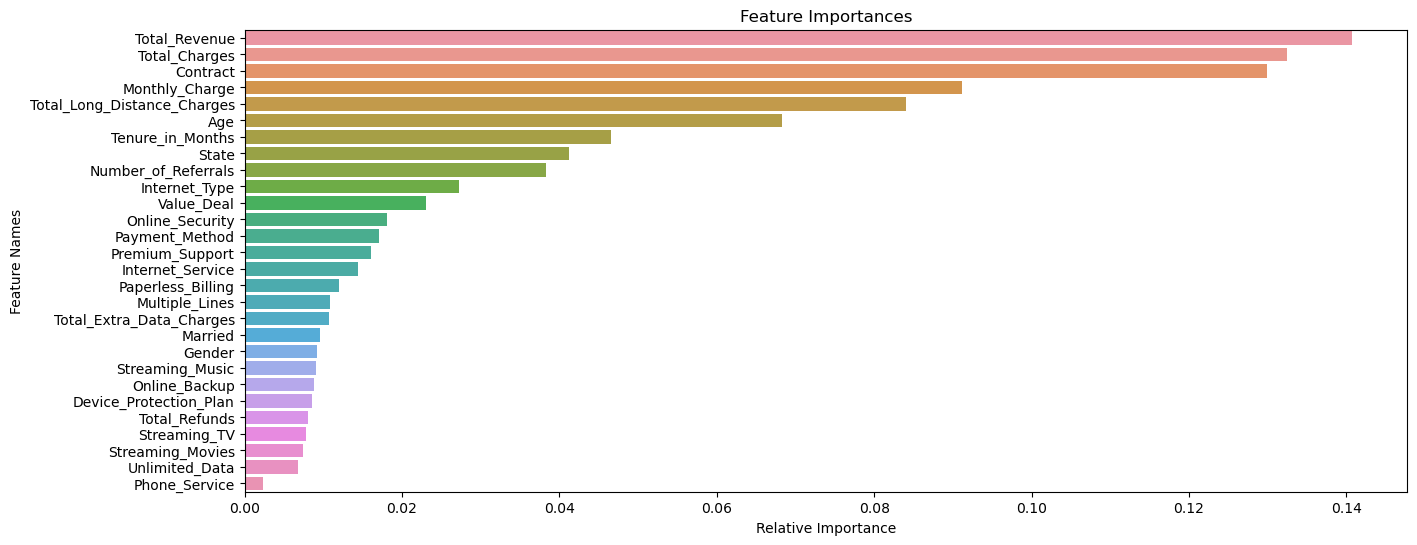

In [5]:
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [6]:
import pandas as pd
# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\KHUSHI\Downloads\pred_churn.xlsx"
 
# Define the sheet name to read data from
sheet_name = 'vw_JoinData'
 
# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)
 
# Display the first few rows of the fetched data
print(new_data.head())
 
# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()
 
# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']
 
# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)
 
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
	new_data[column] = label_encoders[column].transform(new_data[column])
 
# Make predictions
new_predictions = rf_model.predict(new_data)
 
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions
 
# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]
 
# Save the results
original_data.to_csv(r"C:\Users\KHUSHI\Downloads\pred_churn.xlsx", index=False)



  Customer_ID  Gender  Age Married            State  Number_of_Referrals  \
0   82118-JAM  Female   69     Yes  Jammu & Kashmir                    3   
1   82129-JHA  Female   26      No        Jharkhand                    9   
2   82170-TAM    Male   41      No       Tamil Nadu                    5   
3   82427-MAH    Male   36      No      Maharashtra                   15   
4   82473-AND    Male   63     Yes   Andhra Pradesh                   10   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 6     Deal 5            No              0  ...   
1                 8     Deal 5           Yes             No  ...   
2                29        NaN           Yes             No  ...   
3                28     Deal 5           Yes             No  ...   
4                 1     Deal 5            No              0  ...   

   Payment_Method Monthly_Charge  Total_Charges  Total_Refunds  \
0    Mailed Check      24.200001      24.200001            0.0   
1 